In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rotate

In [2]:
t = np.arange(-3,3,0.01)

Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

X = Utrue @ Strue @ Vtrue.T

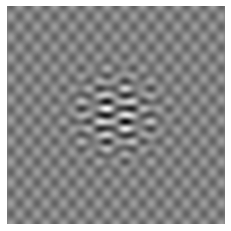

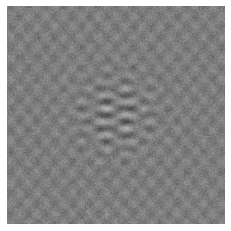

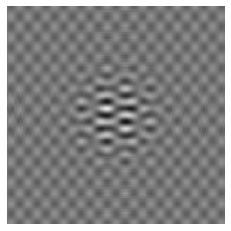

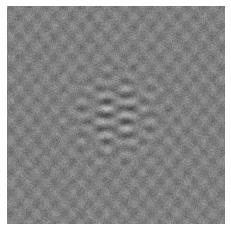

In [3]:
# Figure 1.22a
plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

# Figure 1.22b
sigma = 1
Xnoisy = X + sigma*np.random.randn(*X.shape)
plt.imshow(Xnoisy)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

# Figure 1.22c
u, s, vh = np.linalg.svd(Xnoisy,full_matrices=0)
N = Xnoisy.shape[0]
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma # Hard threshold
r = np.max(np.where(s > cutoff)) # Keep modes w/ sig > cutoff 

Xclean = u[:,:(r+1)] @ np.diag(s[:(r+1)]) @ vh[:(r+1),:]
plt.imshow(Xclean)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

# Figure 1.22d
cdS = np.cumsum(s) / np.sum(s) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy

X90 = u[:,:(r90+1)] @ np.diag(s[:(r90+1)]) @ vh[:(r90+1),:]
plt.imshow(X90)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

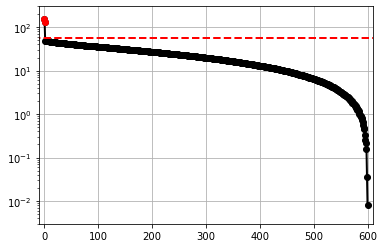

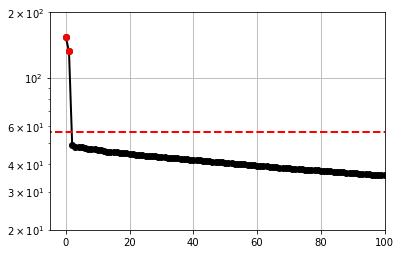

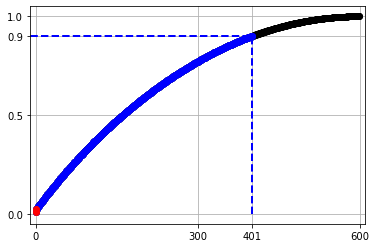

In [4]:
# Figure 1.23a
# Plot Singular Values
fig1,ax1 = plt.subplots(1)
ax1.semilogy(s,'-o', color='k', linewidth=2)
ax1.semilogy(np.diag(s[:(r+1)]),'o', color='r', linewidth=2)
ax1.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', linewidth=2)
plt.xlim((-10,610))
plt.ylim((0.003,300))
ax1.grid()
plt.show()

# Figure 1.23a
fig2,ax2 = plt.subplots(1)
ax2.semilogy(s,'-o', color='k', linewidth=2)
ax2.semilogy(np.diag(s[:(r+1)]),'o', color='r', linewidth=2)
ax2.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', linewidth=2)
plt.xlim((-5,100))
plt.ylim((20,200))
ax2.grid()
plt.show()

# Figure 1.23b
fig3,ax3 = plt.subplots(1)
ax3.plot(cdS,'-o',color='k',linewidth=2)
ax3.plot(cdS[:(r90+1)],'o',color='b',linewidth=2)
ax3.plot(cdS[:(r+1)],'o',color='r',linewidth=2)
plt.xticks(np.array([0, 300, r90, 600]))
plt.yticks(np.array([0, 0.5, 0.9, 1]))
plt.xlim((-10,610))
ax3.plot(np.array([r90, r90, -10]),np.array([0, 0.9, 0.9]),'--',color='b',linewidth=2)
ax3.grid()
plt.show()

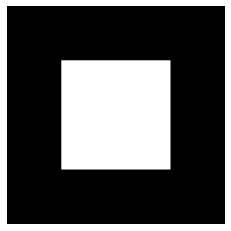

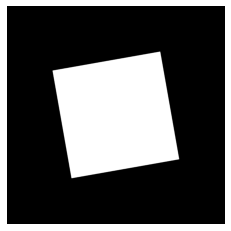

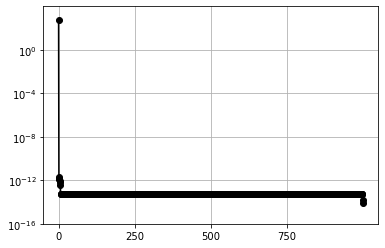

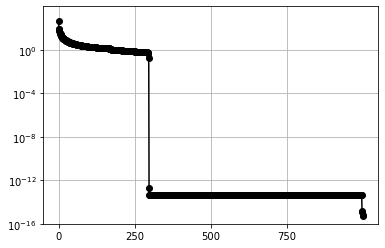

In [5]:
# Figure 1.25a
n = 1000
q = int(n/4)
X = np.zeros((n,n))
X[(q-1):(3*q),(q-1):(3*q)] = 1

plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

# Figure 1.25b
X_rot = rotate(X,10)
X_rot[np.nonzero(X_rot)] = 1

plt.imshow(X_rot)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

# Figure 1.25c
u, s, vh = np.linalg.svd(X,full_matrices=0)

plt.semilogy(s,'-o',color='k')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.show()

# Figure 1.25d
u_rot, s_rot, vh_rot = np.linalg.svd(X_rot,full_matrices=0)

plt.semilogy(s_rot,'-o',color='k')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.show()